# 내 이미지 사용

In [1]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [10]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
# 이미지 읽어서 데이터 준비하기
paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
# print(paths)
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))])
종속 = np.array([paths[i].split('/')[-2] for i in range(len(paths))])
# print(paths[0].split('/'))
print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)


In [12]:
종속[0:10]

array(['C', 'C', 'F', 'J', 'H', 'J', 'C', 'I', 'H', 'I'], dtype='<U1')

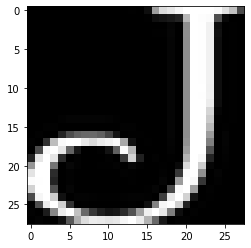

In [13]:
plt.imshow(독립[3], cmap='gray')

In [14]:
독립 = 독립.reshape(18724, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [15]:
# 모델 완성
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [16]:
# 모델을 학습하고
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 10s 4ms/step - loss: 0.7681 - accuracy: 0.7781
Epoch 2/10
586/586 [==============================] - 2s 4ms/step - loss: 0.2896 - accuracy: 0.9116
Epoch 3/10
586/586 [==============================] - 2s 4ms/step - loss: 0.2206 - accuracy: 0.9329
Epoch 4/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1772 - accuracy: 0.9460
Epoch 5/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1531 - accuracy: 0.9533
Epoch 6/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1268 - accuracy: 0.9605
Epoch 7/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1052 - accuracy: 0.9676
Epoch 8/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0867 - accuracy: 0.9745
Epoch 9/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0735 - accuracy: 0.9760
Epoch 10/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0608 - accuracy: 0.980